In [3]:
import numpy as np
import pandas as pd
np.random.seed(19680801)
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
%matplotlib inline

In [13]:
df = pd.DataFrame({
        'MobileNet x1.00' : [91.42, 47187968],
        'SqueezeNet' : [90.71, 23902388],
        'MobileNet x0.25' : [85.87, 3539456],
        'Fd-MobileNet x1.00': [87.730, 11983872],
        'Fd-MobileNet x0.25' : [79.09, 1029888],
        'MobileNet V3 Small x1.00' : [91.16, 18891842],
        'MobileNet V3 Small x0.25' : [86.33, 2540820],
        '[OURS]  Fd-MobileNet V3 x1.00' : [84.19, 6597218],
        '[OURS] Fd-MobileNet V3 x0.25' : [77.99, 697662],
        
    },
    index = ['Accuracy', 'MACs']).T
df.sort_values(by=['MACs'], axis=0, ascending=False)

,Accuracy,MACs
MobileNet x1.00,91.42,47187968.0
SqueezeNet,90.71,23902388.0
MobileNet V3 Small x1.00,91.16,18891842.0
Fd-MobileNet x1.00,87.73,11983872.0
[OURS] Fd-MobileNet V3 x1.00,84.19,6597218.0
MobileNet x0.25,85.87,3539456.0
MobileNet V3 Small x0.25,86.33,2540820.0
Fd-MobileNet x0.25,79.09,1029888.0
[OURS] Fd-MobileNet V3 x0.25,77.99,697662.0


In [14]:
colors = list(mcolors.TABLEAU_COLORS)
print('num colors: %d' % len(colors))

num colors: 10


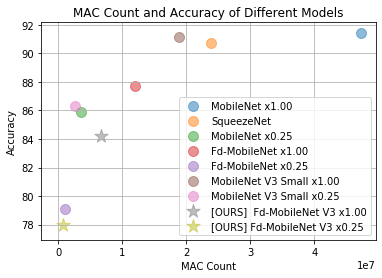

In [34]:
fig, ax = plt.subplots()
assert len(df.index)  <= 10
arr = df.to_numpy()
for i, model in enumerate(df.index):
    y, x = df.to_numpy()[i]
    scale = 200.0 if '[OURS]' in model else 100.0
    marker='*' if '[OURS]' in model else 'o'
    ax.scatter(x, y, c=colors[i], s=scale, marker=marker, label=model,
               alpha=0.5) # gives a faded color

ax.legend(loc='lower right')
ax.grid(True)
plt.title('MAC Count and Accuracy of Different Models')
plt.xlabel('MAC Count')
plt.ylabel('Accuracy')
plt.show()

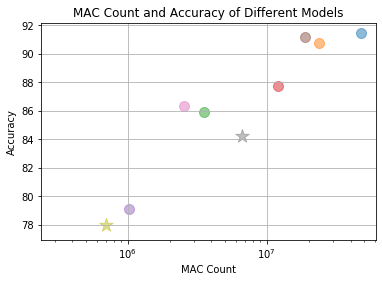

In [44]:
fig, ax = plt.subplots()
assert len(df.index)  <= 10
arr = df.to_numpy()
for i, model in enumerate(df.index):
    y, x = df.to_numpy()[i]
    scale = 200.0 if '[OURS]' in model else 100.0
    marker='*' if '[OURS]' in model else 'o'
    ax.scatter(x, y, c=colors[i], s=scale, marker=marker, label=model,
               alpha=0.5) # gives a faded color

#ax.legend(loc='lower right')
ax.grid(True)
ax.set_xscale('log')
#ax.set_ylim(50, 95)
plt.title('MAC Count and Accuracy of Different Models')
plt.xlabel('MAC Count')
plt.ylabel('Accuracy')
plt.show()